# Chapter 4 - Inferences with Gaussians

In [1]:
import pyjags
import os

import numpy as np


# this import assumes pjbcmassistant.py is two folders
# above this notebook. You may need to redirect it if
# you get a ModuleNotFoundError.
nb_path = os.getcwd()
parent_path = os.path.split(nb_path)[0]
os.chdir(os.path.split(parent_path)[0])
from pjbcmassistant import ModelHandler, SampleHandler
os.chdir(nb_path)

## 4.1 - Inferring a mean and standard deviation

In [2]:
spec_string = """
model:
Gaussian.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 0#1000

data:
x = [1.1, 1.9, 2.3, 1.8]
n = len(x) 

sample:
mu
lambda
sigma

"""

model_spec = ModelHandler(spec_string)

#here, we set an inital value for our sigma variable
model_spec.init_chain('sigma', [2,3,4])

pyjags_model = pyjags.Model(**model_spec.get_model_args())
sample_data = pyjags_model.sample(**model_spec.get_sample_args())

sample_handler = SampleHandler(sample_data)

sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [3]:
sample_handler.summarize()

,mean,std dev,median,mode,HPD,95CI
lambda,2.617426,2.570685,1.890448,0.108252,"[0.012, 7.719]","[0.067, 9.432]"
mu,1.781671,0.769122,1.779524,1.780533,"[0.416, 3.06]","[0.45, 3.2]"
sigma,1.048835,1.027983,0.727307,0.544905,"[0.24, 2.688]","[0.326, 3.855]"


all PSRF values < 1.05 | maximum PSRF: sigma at 1.0036726035389192.


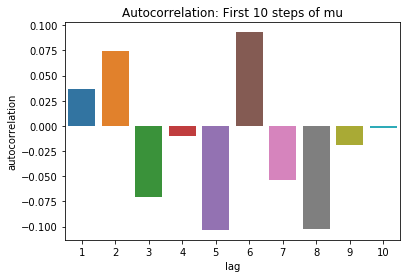

In [4]:
sample_handler.diagnostic()
sample_handler.autocorr('mu')

/home/isaiah/anaconda3/envs/pyjagsBCM/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


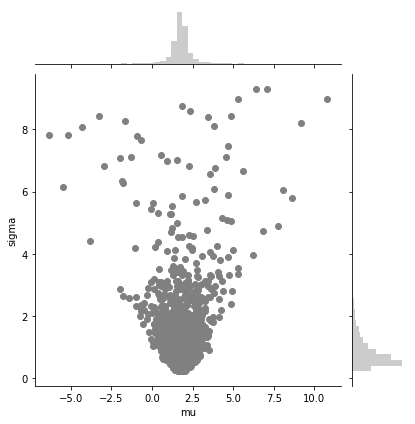

In [5]:
sample_handler.vizjoint('mu','sigma')

## 4.2 - The Seven Scientists

In [6]:
spec_string = """
model:
SevenScientists.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
n = len(x)

sample:
mu
sigma

"""

model_spec = ModelHandler(spec_string)

pyjags_model = pyjags.Model(**model_spec.get_model_args())
sample_data = pyjags_model.sample(**model_spec.get_sample_args())

sample_handler = SampleHandler(sample_data)

sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [7]:
sample_handler.summarize()

,mean,std dev,median,mode,HPD,95CI
mu,9.896300,3.182248e-01,9.929436,9.888630,"[9.569, 10.131]","[9.53, 10.103]"
sigma_0,18638.689665,1.003978e+06,54.117734,275004.514817,"[7.991, 693.096]","[16.415, 1471.432]"
sigma_1,47.682666,5.450722e+02,9.285498,144.574543,"[1.762, 109.99]","[2.782, 234.644]"
sigma_2,33.236622,9.101545e+02,2.501694,229.392979,"[0.078, 24.991]","[0.779, 47.222]"
sigma_3,1.059211,1.541897e+01,0.133615,3.439391,"[0.015, 2.017]","[0.026, 3.62]"
sigma_4,2.316706,1.982428e+01,0.453886,4.249133,"[0.019, 5.063]","[0.083, 10.903]"
sigma_5,1.171691,1.928408e+01,0.124282,4.463533,"[0.013, 1.664]","[0.025, 3.227]"
sigma_6,1.354601,2.041128e+01,0.217953,5.054312,"[0.014, 2.637]","[0.037, 5.595]"


all PSRF values < 1.05 | maximum PSRF: mu at 1.0005155065057465.


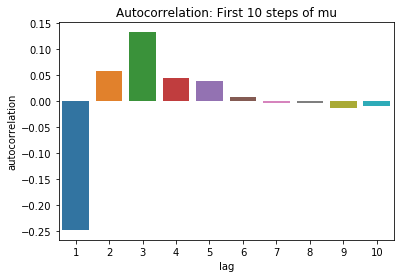

In [8]:
sample_handler.diagnostic()
sample_handler.autocorr('mu')

## 4.3 - Repeated measurement of IQ

In [9]:
spec_string = """
model:
IQ.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [[90,95,100],[105,110,115],[150,155,160]]
n, m = np.shape(x)

# this is an ugly way to do this, because we're "calling" a
# module (numpy) that we haven't actually imported... I'm sure there's
# a smart alternative, but I won't dwell on it just yet.

sample:
mu
sigma

"""

model_spec = ModelHandler(spec_string)

# model_spec.data['x'] = [[90,95,100],[105,110,115],[150,155,160]]

pyjags_model = pyjags.Model(**model_spec.get_model_args())
sample_data = pyjags_model.sample(**model_spec.get_sample_args())

sample_handler = SampleHandler(sample_data)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [10]:
sample_handler.summarize()

,mean,std dev,median,mode,HPD,95CI
mu_0,95.000040,4.247749,95.038472,95.790263,"[86.76, 103.312]","[86.619, 103.187]"
mu_1,109.780179,4.196091,109.834379,109.944624,"[101.326, 117.983]","[101.321, 117.972]"
mu_2,154.983429,4.029754,154.957475,155.507426,"[146.756, 163.52]","[146.766, 163.573]"
sigma,6.634667,2.748403,5.925290,4.987365,"[2.67, 12.112]","[3.357, 13.791]"


all PSRF values < 1.05 | maximum PSRF: sigma at 1.0035957129718858.


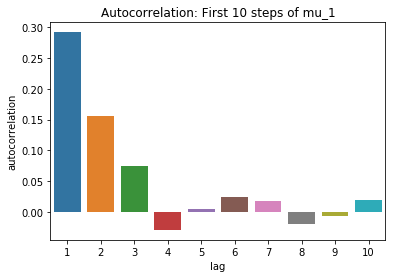

In [11]:
sample_handler.diagnostic()
sample_handler.autocorr('mu_1')